In [1]:
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
##################################     R E T 48 A T R      S T R A T E G Y       ###########################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################
###########################################################################################################################

In [2]:
# CLEAR VAR
from clearall import clearall
clearall()

In [3]:
# LIBRAIRIES
import pandas as pd
import numpy as np
import time
import talib
import hmmlearn
import datetime as dt


In [4]:
%%time

x = 'EUR/USD'
TICKERS = [x]
_period = 'm5'

df = pd.read_csv('Base_Clean/'+x.replace('/','')+_period+'.csv')
df = df.drop(['HigMax','LowMin','Total'],axis=1)

CPU times: user 1.5 s, sys: 160 ms, total: 1.66 s
Wall time: 1.66 s


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751406 entries, 0 to 751405
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Date      751406 non-null  object 
 1   OpenBid   751406 non-null  float64
 2   HighBid   751406 non-null  float64
 3   LowBid    751406 non-null  float64
 4   CloseBid  751406 non-null  float64
 5   OpenAsk   751406 non-null  float64
 6   HighAsk   751406 non-null  float64
 7   LowAsk    751406 non-null  float64
 8   CloseAsk  751406 non-null  float64
 9   Open      751406 non-null  float64
 10  High      751406 non-null  float64
 11  Low       751406 non-null  float64
 12  Close     751406 non-null  float64
dtypes: float64(12), object(1)
memory usage: 74.5+ MB


In [6]:
df.head()

,Date,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close
0,2010-09-06 17:00:00,1.28739,1.28817,1.28729,1.28802,1.28753,1.28831,1.28747,1.28820,1.287460,1.288240,1.287380,1.288110
1,2010-09-06 17:05:00,1.28802,1.28814,1.28792,1.28793,1.28820,1.28828,1.28810,1.28810,1.288110,1.288210,1.288010,1.288015
2,2010-09-06 17:10:00,1.28793,1.28815,1.28783,1.28792,1.28810,1.28830,1.28800,1.28805,1.288015,1.288225,1.287915,1.287985
3,2010-09-06 17:15:00,1.28792,1.28803,1.28783,1.28784,1.28805,1.28818,1.28800,1.28802,1.287985,1.288105,1.287915,1.287930
4,2010-09-06 17:20:00,1.28784,1.28813,1.28782,1.28784,1.28802,1.28841,1.28800,1.28809,1.287930,1.288270,1.287910,1.287965


In [7]:
# VANILLA TEST ON RETURN

In [8]:
%%time
df['Return48'] = (df['Close'] - df['Close'].shift(48))/df['Close'].shift(48)
df['ATR'] = talib.ATR(df['High'],df['Low'],df['Close'],timeperiod = 48)
df['Signal'] = np.where(df['Return48']>0,1,-1)
df.head()

CPU times: user 31.3 ms, sys: 4.9 ms, total: 36.2 ms
Wall time: 35.4 ms


,Date,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,Return48,ATR,Signal
0,2010-09-06 17:00:00,1.28739,1.28817,1.28729,1.28802,1.28753,1.28831,1.28747,1.28820,1.287460,1.288240,1.287380,1.288110,NaN,NaN,-1
1,2010-09-06 17:05:00,1.28802,1.28814,1.28792,1.28793,1.28820,1.28828,1.28810,1.28810,1.288110,1.288210,1.288010,1.288015,NaN,NaN,-1
2,2010-09-06 17:10:00,1.28793,1.28815,1.28783,1.28792,1.28810,1.28830,1.28800,1.28805,1.288015,1.288225,1.287915,1.287985,NaN,NaN,-1
3,2010-09-06 17:15:00,1.28792,1.28803,1.28783,1.28784,1.28805,1.28818,1.28800,1.28802,1.287985,1.288105,1.287915,1.287930,NaN,NaN,-1
4,2010-09-06 17:20:00,1.28784,1.28813,1.28782,1.28784,1.28802,1.28841,1.28800,1.28809,1.287930,1.288270,1.287910,1.287965,NaN,NaN,-1


In [9]:
len(df[df.Signal == -1]),len(df[df.Signal == 1]),len(df[df.Signal == -1])-len(df[df.Signal == 1])

(375491, 375915, -424)

In [10]:
df = df.dropna()
df.head()

,Date,OpenBid,HighBid,LowBid,CloseBid,OpenAsk,HighAsk,LowAsk,CloseAsk,Open,High,Low,Close,Return48,ATR,Signal
48,2010-09-06 21:00:00,1.28727,1.28751,1.28726,1.28729,1.28765,1.28792,1.28754,1.28757,1.287460,1.287715,1.287400,1.287430,-0.000528,0.000213,-1
49,2010-09-06 21:05:00,1.28729,1.28729,1.28703,1.28713,1.28757,1.28757,1.28722,1.28740,1.287430,1.287430,1.287125,1.287265,-0.000582,0.000215,-1
50,2010-09-06 21:10:00,1.28713,1.28731,1.28713,1.28727,1.28740,1.28754,1.28736,1.28753,1.287265,1.287425,1.287245,1.287400,-0.000454,0.000215,-1
51,2010-09-06 21:15:00,1.28727,1.28733,1.28723,1.28723,1.28753,1.28753,1.28741,1.28741,1.287400,1.287430,1.287320,1.287320,-0.000474,0.000212,-1
52,2010-09-06 21:25:00,1.28723,1.28723,1.28698,1.28708,1.28741,1.28742,1.28721,1.28735,1.287320,1.287325,1.287095,1.287215,-0.000582,0.000213,-1


Début des opérations horodatée à 2020-11-16 16:18:08.134107
 Support Vector Machine pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1: 300948, 1: 300139})
 Achat pour  EUR/USD 

Achat - Accuracy : 99.97 %
Achat - Precision : 100.0 %
Achat - Recall : 99.95 %
Achat - F-measure: : 99.97 % 


              precision    recall  f1-score   support

          -1       1.00      1.00      1.00    210664
           1       1.00      1.00      1.00    210097

    accuracy                           1.00    420761
   macro avg       1.00      1.00      1.00    420761
weighted avg       1.00      1.00      1.00    420761

[[210657      7]
 [   103 209994]]


 Joblib Model  JOBLIB/svm48/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=1.000


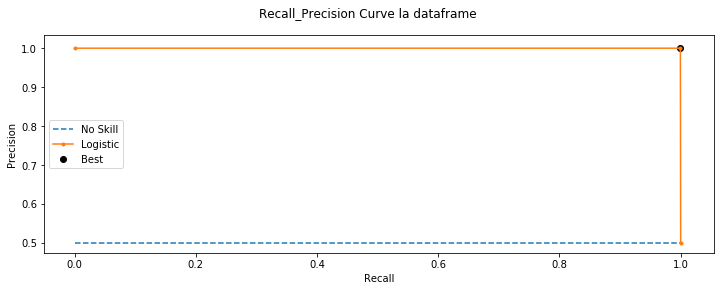



 ===> MODELISATION terminée.
Temps d'excution du module 0:00:48.199719


In [11]:
from svm48 import modelize

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x)
print("\n\n ===> MODELISATION terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

In [12]:
df.Signal = df.Signal.shift(-1)
df = df.dropna()

Début des opérations horodatée à 2020-11-16 16:18:56.590338
 Support Vector Machine pour  EUR/USD 
DF (Les 20% de la fin ont été enlevé pour un OOST ultérieur
Signaux achat Counter({-1.0: 300947, 1.0: 300139})
 Achat pour  EUR/USD 

Achat - Accuracy : 92.52 %
Achat - Precision : 92.57 %
Achat - Recall : 92.45 %
Achat - F-measure: : 92.51 % 


              precision    recall  f1-score   support

        -1.0       0.92      0.93      0.93    210663
         1.0       0.93      0.92      0.93    210098

    accuracy                           0.93    420761
   macro avg       0.93      0.93      0.93    420761
weighted avg       0.93      0.93      0.93    420761

[[195061  15602]
 [ 15854 194244]]


 Joblib Model  JOBLIB/svm48/SaveEURUSDm5.sav  dumped to disk 
Best Threshold=1.000000, F-Score=0.925


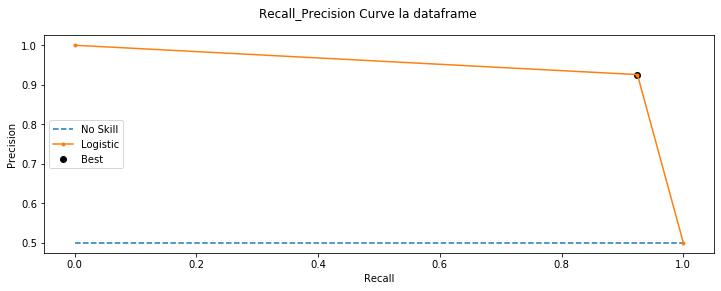



 ===> MODELISATION terminée.
Temps d'excution du module 0:06:44.101911


In [13]:
from svm48 import modelize
_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())
for x in TICKERS:
    modelize(df,x)
print("\n\n ===> MODELISATION terminée.")
_t2 = dt.datetime.now()
print("Temps d'excution du module",str((_t2 - _t1)))

In [14]:
%%time
import joblib
df_oos = df.iloc[-int(len(df) * 0.2):,:]
df_oos = df_oos.set_index(df_oos.Date, drop =True)
df_oos = df_oos[['Return48','ATR']]

loaded_model = joblib.load('JOBLIB/svm48/SaveEURUSDm5.sav')
SIGNALS = loaded_model.predict(df_oos)

CPU times: user 1min 12s, sys: 126 ms, total: 1min 13s
Wall time: 1min 13s


In [15]:
SIGNALS

array([ 1.,  1.,  1., ..., -1., -1., -1.])

In [16]:
len(df.iloc[-int(len(df) * 0.2):,:].Signal.shift(-1).dropna()),len(SIGNALS)

(150270, 150271)

In [17]:
resultat = pd.DataFrame()

In [18]:
resultat['SIGNALS'] = SIGNALS
resultat['Controle'] = df.iloc[-int(len(df) * 0.2):,:].Signal.dropna().to_list()
resultat['Result'] = resultat['SIGNALS'] - resultat['Controle']

In [19]:
resultat

,SIGNALS,Controle,Result
0,1.0,1.0,0.0
1,1.0,1.0,0.0
2,1.0,1.0,0.0
3,1.0,1.0,0.0
4,1.0,1.0,0.0
...,...,...,...
150266,-1.0,-1.0,0.0
150267,-1.0,-1.0,0.0
150268,-1.0,-1.0,0.0
150269,-1.0,-1.0,0.0


In [20]:
%%time
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,classification_report
import colorama as col



accub = round(accuracy_score(resultat['Controle'], SIGNALS) * 100,2)
precb = round(precision_score(resultat['Controle'], SIGNALS) * 100,2)
recallb = round(recall_score(resultat['Controle'], SIGNALS) * 100,2)
#f1b = round(f1_score(resultat['Controle'], SIGNALS) * 100,2)

print(col.Fore.BLUE,'Achat pour',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if accub > 69 and precb > 69 :
    print(col.Fore.GREEN)
elif accub < 51 or precb < 51 :
    print(col.Fore.RED)
else:
    print(col.Fore.YELLOW)

print('Achat - Accuracy :' ,accub,'%')
print('Achat - Precision :',precb,'%')
print('Achat - Recall :', recallb,'%')
#print('Achat - F-measure: :' ,f1b,'%',col.Style.RESET_ALL)
print('\n')
print(col.Style.RESET_ALL)
print(classification_report(resultat['Controle'], SIGNALS))
conf_matrix = pd.DataFrame(index = ['vrais_réels','Faux_réels'])
conf_matrix['Vrais_estimés'] = ['Vrais_positifs','Faux_positifs']
conf_matrix['Faux_estimés'] = ['Faux_négatif','Vrais-négatifs']
print(confusion_matrix(resultat['Controle'], SIGNALS))
print('\n')

 Achat pour  EUR/USD 

Achat - Accuracy : 92.63 %
Achat - Precision : 92.82 %
Achat - Recall : 92.55 %



              precision    recall  f1-score   support

        -1.0       0.92      0.93      0.93     74495
         1.0       0.93      0.93      0.93     75776

    accuracy                           0.93    150271
   macro avg       0.93      0.93      0.93    150271
weighted avg       0.93      0.93      0.93    150271

[[69074  5421]
 [ 5649 70127]]


CPU times: user 470 ms, sys: 6.27 ms, total: 476 ms
Wall time: 475 ms


In [21]:
###########
## BT VANILLA => TIME EXIT AND/OR REVERSAL SIGNAL
#######

In [22]:
%%time
print('Importing Librairies...')
from sklearn.linear_model import LinearRegression
import colorama as col
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
import seaborn as sns
import time
import os
import datetime as dt
import numpy as np
import fxcmpy
import socketio
import shelve
import talib
import statistics
import pyttsx3

#from numpy import loadtxt
#from functools import reduce
_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

number = 10000
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_total = 0
_cash_ini = 200000
_cash = _cash_ini
_rate = 1
#_flag = 0

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash = _cash_ini
WINNERS = []
LOOSERS = []
SIGNAL = []
OPEN = []
OPEN_BID = []
OPEN_ASK = []


_atr = 80
_year_bottom = '2018-09-05 22:45:00'
_year_top = '2018-10-09 00:55:00'
#_year_top = '2020-05-07 00:55:00'

_verbose = 0

engine = pyttsx3.init()

print('Librairies imported\n')
print('version fxcmpy :',fxcmpy.__version__)
%matplotlib inline
plt.style.use('seaborn')
engine.say("librairie loaded")
engine.runAndWait()

df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Max lenght of trade','Min lenght of trade',\
    'Average lenght of trade','Cumul pnl'])

x = 'EUR/USD'

print('Prêt')

##########################################################
##########################################################
##########################################################

engine.say("קדימה")
engine.runAndWait()

position = 0

print(col.Fore.MAGENTA,'Le rate du ticker',x,'est à ',_rate,col.Style.RESET_ALL)

print('Chargement des bases')

price = df.copy()
price.index = pd.to_datetime(price['Date'])
price = price.drop(['Date','Return48','ATR','Signal'],axis=1)
price = price.iloc[-int(len(df) * 0.2):,:]
price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)
price['Return48'] = (price['Close'] - price['Close'].shift(3))/price['Close'].shift(3)
price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'])
price['Signal'] = SIGNALS
price.Signal = price.Signal.shift(3)
price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Bases chargées')
print('Préparation des dataframes')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)
    
price = price.dropna()

_position = 0
_equity = 0
_nbtransactions = 0
backtest_graph = pd.DataFrame()
EQUITY = [_cash]
CASH = [_cash]
_winner = 0
_looser = 0
_index_entry = 0
TRADE_DURATION = []
_average_duration = 0
_size = 50000

PRICE_BUY = []
PRICE_SELL = []

_total = 0

_target = 0.002
#_sl = 0.0015
#_filtre_multipoz = 0.5 # En %
#_filtre_multipoz = _filtre_multipoz/100

_open_buy = 0
_open_sell = 0

for i in range(0,len(price)):
    
    if _position == 0:
        # BUY SIGNAL
        if  price.Signal[i] == 1 and price.Signal[i-1] == -1: 
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        
        
        # SELL SIGNAL
        elif price.Signal[i] == -1 and price.Signal[i-1] == 1: 
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

            TOTAL_OPEN.append(1)

        else :
            _pnl = 0
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
    
    elif _position == 1:
        
        ### CLOSE LONG
        #if price.Signal[i] == -1 and price.Signal[i-1] == 1 : # or i - _index_entry >= 5:
        if i - _index_entry > 48:
            _position = 0
            _pnl = (price.High_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.High_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        
        else:

            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0) ############### 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 


    elif _position == -1:

        ### CLOSE SHORT
        #if _position == -1 and price.Signal[i-1] == -1 : # or i - _index_entry >= 5 :
        if i - _index_entry > 48:   
            _position = 0
            _pnl = - (price.Low_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Low_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        else:

            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _equity = _cash + _pnl

            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)

            TOTAL_PNL_REAL.append(0)
            
    elif i == (len(price)-1) and _position != 0 :

        if _position == -1:
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_sell,'position closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_buy,'positions closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

try:
    _average_duration = round(statistics.mean(TRADE_DURATION),2)
    _max_duration = max(TRADE_DURATION)
    _min_duration = min([item for item in TRADE_DURATION if item !=0])

except:
    print("(pas de duration)") 
    _average_duration = 'NA' 
print(col.Fore.BLUE,'Pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if _total > 0:              
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' )
else:
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.RED,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' ) 
print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)

backtest_graph['Equity'] = EQUITY

df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_max_duration),(_min_duration),(_average_duration),(_total)]

DER_POZ.append(_pnl)

engine.say("Finito caucau")
engine.runAndWait()
_t2 = dt.datetime.now()
print("Temps d'excution du BT",str((_t2 - _t1)))


Importing Librairies...
Début des opérations horodatée à 2020-11-16 16:26:54.788736
Librairies imported

version fxcmpy : 1.2.6
Prêt
 Le rate du ticker EUR/USD est à  1 
Chargement des bases
Bases chargées
Préparation des dataframes
TETEL process effectué
 ENTERING THE BACKTEST 
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  1123.0 !. En  87   transactions.
 
Nbre de winners : 46 
 
Nbre de loosers : 40 
Temps d'excution du BT 0:00:09.777572
CPU times: user 931 ms, sys: 121 ms, total: 1.05 s
Wall time: 10.1 s


In [23]:
df_historical = pd.DataFrame()
df_historical = pd.DataFrame(index=DATE)
df_historical['Contract'] = CONTRACT
df_historical['Open_Poz'] = OPEN_POZ
df_historical['Close_Pos'] = CLOSE_POZ
df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
df_historical['Pnl_Real'] = TOTAL_PNL_REAL
df_historical = df_historical.sort_index()
_generated_cash = round(df_historical.Pnl_Real.sum() * _rate,2)
_generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
if _generated_cash <= 0:
    print('Started Cash :',_size)
    print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

else:
    print('Started Cash :',_size)
    print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

#print('Pnl latent minimal :',str(round((df_historical.Pnl_Real.min()) * _rate,2))+'$')
#print('Pnl latent maximal :',str(round((df_historical.Pnl_Real.max())* _rate,2))+'$')
#print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean()* _rate,2))+'$')
#print('Maximal trade duration',_max_duration)
#print('Minimal trade duration',_min_duration)
print('Average trade duration',_average_duration)
print('# Winners ',df_resultats.T['Nbre Winners'].sum())
print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum() * _rate,2))
print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum() * _rate,2))
print(col.Fore.BLUE,'PROFIT FACTOR : ',\
    abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
print(col.Fore.CYAN,'Winners Ratio :',\
    round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN) * _rate,2))
print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate * 100 / _cash_ini,2))
print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate / _cash_ini * 100,2))
print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL)) * _rate) / _cash_ini * 100,2))
print('Number of opened trades',sum(TOTAL_OPEN))
print('Number of closed trades',sum(TOTAL_CLOSE))
#print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

 EUR/USD  results 
 Tested Period 2018-09-05 22:45:00  à 2018-10-09 00:55:00 
 Total Number of trades 87 
Started Cash : 50000
P&L  in currency:  1123.0$ 
P&L in %:  0.56% 
Average trade duration 49
# Winners  46
# Loosers  40
Cumulated gains 3472.5
Cumulated losses -2349.5
 PROFIT FACTOR :  1.48 
 Winners Ratio : 53.49 % 
Average Winners 39.91
Average Loosers -27.01
Average pnl 12.91
% Average Winners 0.02
% Average Loosers -0.01
% Average pnl 0.01
Number of opened trades 87
Number of closed trades 86


In [24]:
###########
## BT COMPARE => TIME EXIT AND/OR REVERSAL SIGNAL +  RE-ENTERING ON SIGNAL
#######

In [25]:
%%time

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

number = 10000
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_total = 0
_cash_ini = 200000
_cash = _cash_ini
_rate = 1
#_flag = 0

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash = _cash_ini
WINNERS = []
LOOSERS = []
SIGNAL = []
OPEN = []
OPEN_BID = []
OPEN_ASK = []


_atr = 80

_verbose = 0

engine = pyttsx3.init()

%matplotlib inline
plt.style.use('seaborn')

df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Max lenght of trade','Min lenght of trade',\
    'Average lenght of trade','Cumul pnl'])


print('Prêt')

##########################################################
##########################################################
##########################################################

engine.say("קדימה")
engine.runAndWait()

position = 0

print(col.Fore.MAGENTA,'Le rate du ticker',x,'est à ',_rate,col.Style.RESET_ALL)

print('Chargement des bases')

price = df.copy()
price.index = pd.to_datetime(price['Date'])
price = price.drop(['Date','Return48','ATR','Signal'],axis=1)
price = price.iloc[-int(len(df) * 0.2):,:]
price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)
price['Return48'] = (price['Close'] - price['Close'].shift(3))/price['Close'].shift(3)
price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'])
price['Signal'] = SIGNALS
price.Signal = price.Signal.shift(3)
price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Bases chargées')
print('Préparation des dataframes')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)
    
price = price.dropna()

_position = 0
_equity = 0
_nbtransactions = 0
backtest_graph = pd.DataFrame()
EQUITY = [_cash]
CASH = [_cash]
_winner = 0
_looser = 0
_index_entry = 0
TRADE_DURATION = []
_average_duration = 0
_size = 50000

PRICE_BUY = []
PRICE_SELL = []

_total = 0

#_target = 0.006
#_sl = 0.0015
#_filtre_multipoz = 0.5 # En %
#_filtre_multipoz = _filtre_multipoz/100

_open_buy = 0
_open_sell = 0

for i in range(0,len(price)):
    
    if _position == 0:
        # BUY SIGNAL
        if  price.Signal[i] == 1 and price.Signal[i-1] == -1: 
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        
        
        # SELL SIGNAL
        elif price.Signal[i] == -1 and price.Signal[i-1] == 1: 
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

            TOTAL_OPEN.append(1)

        else :
            _pnl = 0
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
    
    elif _position == 1:

        ### CLOSE LONG
        #if price.Signal[i] == -1 and price.Signal[i-1] == 1 : # or i - _index_entry >= 2:
        if i - _index_entry > 48:
            _position = 0
            _pnl = (price.High_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.High_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        
        if price.Signal[i] == 1 and price.Signal[i-1] == 1 and i - _index_entry <= 48:
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        else:

            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0) ############### 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 


    elif _position == -1:

        ### CLOSE SHORT
        #if _position == -1 and price.Signal[i-1] == -1 : # or i - _index_entry >= 12 :
        if i - _index_entry > 48:   
            _position = 0
            _pnl = - (price.Low_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Low_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if price.Signal[i] == -1 and price.Signal[i-1] == -1 and i - _index_entry <= 48:
            
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

        else:

            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _equity = _cash + _pnl

            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)

            TOTAL_PNL_REAL.append(0)
            
    elif i == (len(price)-1) and _position != 0 :

        if _position == -1:
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_sell,'position closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_buy,'positions closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

try:
    _average_duration = round(statistics.mean(TRADE_DURATION),2)
    _max_duration = max(TRADE_DURATION)
    _min_duration = min([item for item in TRADE_DURATION if item !=0])

except:
    print("(pas de duration)") 
    _average_duration = 'NA' 
print(col.Fore.BLUE,'Pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if _total > 0:              
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' )
else:
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.RED,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' ) 
print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)

backtest_graph['Equity'] = EQUITY

df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_max_duration),(_min_duration),(_average_duration),(_total)]

DER_POZ.append(_pnl)

engine.say("Finito caucau")
engine.runAndWait()
_t2 = dt.datetime.now()
print("Temps d'excution du BT",str((_t2 - _t1)))

Début des opérations horodatée à 2020-11-16 16:27:04.695511
Prêt
 Le rate du ticker EUR/USD est à  1 
Chargement des bases
Bases chargées
Préparation des dataframes
TETEL process effectué
 ENTERING THE BACKTEST 
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  -16580.0 !. En  3372   transactions.
 
Nbre de winners : 1490 
 
Nbre de loosers : 1866 
Temps d'excution du BT 0:00:07.148034
CPU times: user 1.06 s, sys: 86.3 ms, total: 1.14 s
Wall time: 7.15 s


In [26]:
df_historical = pd.DataFrame()
df_historical = pd.DataFrame(index=DATE)
df_historical['Contract'] = CONTRACT
df_historical['Open_Poz'] = OPEN_POZ
df_historical['Close_Pos'] = CLOSE_POZ
df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
df_historical['Pnl_Real'] = TOTAL_PNL_REAL
df_historical = df_historical.sort_index()
_generated_cash = round(df_historical.Pnl_Real.sum() * _rate,2)
_generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
if _generated_cash <= 0:
    print('Started Cash :',_size)
    print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

else:
    print('Started Cash :',_size)
    print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

#print('Pnl latent minimal :',str(round((df_historical.Pnl_Real.min()) * _rate,2))+'$')
#print('Pnl latent maximal :',str(round((df_historical.Pnl_Real.max())* _rate,2))+'$')
#print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean()* _rate,2))+'$')
#print('Maximal trade duration',_max_duration)
#print('Minimal trade duration',_min_duration)
print('Average trade duration',_average_duration)
print('# Winners ',df_resultats.T['Nbre Winners'].sum())
print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum() * _rate,2))
print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum() * _rate,2))
print(col.Fore.BLUE,'PROFIT FACTOR : ',\
    abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
print(col.Fore.CYAN,'Winners Ratio :',\
    round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN) * _rate,2))
print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate * 100 / _cash_ini,2))
print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate / _cash_ini * 100,2))
print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL)) * _rate) / _cash_ini * 100,2))
print('Number of opened trades',sum(TOTAL_OPEN))
print('Number of closed trades',sum(TOTAL_CLOSE))
#print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

 EUR/USD  results 
 Tested Period 2018-09-05 22:45:00  à 2018-10-09 00:55:00 
 Total Number of trades 3356 
Started Cash : 50000
P&L in currency:  -16580.0$ 
P&L in %:  -8.29% 
Average trade duration 49
# Winners  1490
# Loosers  1866
Cumulated gains 151714.0
Cumulated losses -168294.0
 PROFIT FACTOR :  0.9 
 Winners Ratio : 44.4 % 
Average Winners 238.17
Average Loosers -264.2
Average pnl -26.03
% Average Winners 0.12
% Average Loosers -0.13
% Average pnl -0.26
Number of opened trades 637
Number of closed trades 3356


In [27]:
_target = 0.0015

In [28]:
#######
## BT COMPARE + TARGET
########

In [29]:
%%time

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

number = 10000
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_total = 0
_cash_ini = 200000
_cash = _cash_ini
_rate = 1
#_flag = 0

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash = _cash_ini
WINNERS = []
LOOSERS = []
SIGNAL = []
OPEN = []
OPEN_BID = []
OPEN_ASK = []


_atr = 80

_verbose = 0

engine = pyttsx3.init()

%matplotlib inline
plt.style.use('seaborn')

df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Max lenght of trade','Min lenght of trade',\
    'Average lenght of trade','Cumul pnl'])


print('Prêt')

##########################################################
##########################################################
##########################################################

engine.say("קדימה")
engine.runAndWait()

position = 0

print(col.Fore.MAGENTA,'Le rate du ticker',x,'est à ',_rate,col.Style.RESET_ALL)

print('Chargement des bases')

price = df.copy()
price.index = pd.to_datetime(price['Date'])
price = price.drop(['Date','Return48','ATR','Signal'],axis=1)
price = price.iloc[-int(len(df) * 0.2):,:]
price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)
price['Return48'] = (price['Close'] - price['Close'].shift(3))/price['Close'].shift(3)
price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'])
price['Signal'] = SIGNALS
price.Signal = price.Signal.shift(3)
price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Bases chargées')
print('Préparation des dataframes')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)
    
price = price.dropna()

_position = 0
_equity = 0
_nbtransactions = 0
backtest_graph = pd.DataFrame()
EQUITY = [_cash]
CASH = [_cash]
_winner = 0
_looser = 0
_index_entry = 0
TRADE_DURATION = []
_average_duration = 0
_size = 50000

PRICE_BUY = []
PRICE_SELL = []

_total = 0

#_target = 0.006
#_sl = 0.0015
#_filtre_multipoz = 0.5 # En %
#_filtre_multipoz = _filtre_multipoz/100

_open_buy = 0
_open_sell = 0

for i in range(0,len(price)):
    
    if _position == 0:
        # BUY SIGNAL
        if  price.Signal[i] == 1 and price.Signal[i-1] == -1: 
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        
        
        # SELL SIGNAL
        elif price.Signal[i] == -1 and price.Signal[i-1] == 1: 
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

            TOTAL_OPEN.append(1)

        else :
            _pnl = 0
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
    
    elif _position == 1:

        ### CLOSE LONG
        #if price.Signal[i] == -1 and price.Signal[i-1] == 1 : # or i - _index_entry >= 2:
        if i - _index_entry > 48:
            _position = 0
            _pnl = (price.High_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.High_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        
        ### RE_ENGAGE ON VALID SIGNAL
        if price.Signal[i] == 1 and price.Signal[i-1] == 1 and i - _index_entry <= 48:
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)
        
        # CLOSE LONG ON TARGET
        if (float(price.Low_Bid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) >= _target:
            _position = 0
            _pnl = (price.High_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.High_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

        else:

            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0) ############### 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 


    elif _position == -1:

        ### CLOSE SHORT
        #if _position == -1 and price.Signal[i-1] == -1 : # or i - _index_entry >= 12 :
        if i - _index_entry > 48:   
            _position = 0
            _pnl = - (price.Low_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Low_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        ### RE-ENGAGE ON VALID SIGNAL
        if price.Signal[i] == -1 and price.Signal[i-1] == -1 and i - _index_entry <= 48:
            
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

        ### CLOSE SHORT ON TARGET
        if (float(price.High_Ask.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) <= -_target :
            _position = 0
            _pnl = - (price.Low_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Low_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0
        
        else:

            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _equity = _cash + _pnl

            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)

            TOTAL_PNL_REAL.append(0)
            
    elif i == (len(price)-1) and _position != 0 :

        if _position == -1:
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_sell,'position closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_buy,'positions closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

try:
    _average_duration = round(statistics.mean(TRADE_DURATION),2)
    _max_duration = max(TRADE_DURATION)
    _min_duration = min([item for item in TRADE_DURATION if item !=0])

except:
    print("(pas de duration)") 
    _average_duration = 'NA' 
print(col.Fore.BLUE,'Pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if _total > 0:              
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' )
else:
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.RED,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' ) 
print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)

backtest_graph['Equity'] = EQUITY

df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_max_duration),(_min_duration),(_average_duration),(_total)]

DER_POZ.append(_pnl)

engine.say("Finito caucau")
engine.runAndWait()
_t2 = dt.datetime.now()
print("Temps d'excution du BT",str((_t2 - _t1)))

Début des opérations horodatée à 2020-11-16 16:27:11.988546
Prêt
 Le rate du ticker EUR/USD est à  1 
Chargement des bases
Bases chargées
Préparation des dataframes
TETEL process effectué
 ENTERING THE BACKTEST 
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  -102141.0 !. En  2480   transactions.
 
Nbre de winners : 729 
 
Nbre de loosers : 1655 
Temps d'excution du BT 0:00:07.323156
CPU times: user 1.23 s, sys: 87.9 ms, total: 1.32 s
Wall time: 7.32 s


In [30]:
df_historical = pd.DataFrame()
df_historical = pd.DataFrame(index=DATE)
df_historical['Contract'] = CONTRACT
df_historical['Open_Poz'] = OPEN_POZ
df_historical['Close_Pos'] = CLOSE_POZ
df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
df_historical['Pnl_Real'] = TOTAL_PNL_REAL
df_historical = df_historical.sort_index()
_generated_cash = round(df_historical.Pnl_Real.sum() * _rate,2)
_generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
if _generated_cash <= 0:
    print('Started Cash :',_size)
    print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

else:
    print('Started Cash :',_size)
    print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

#print('Pnl latent minimal :',str(round((df_historical.Pnl_Real.min()) * _rate,2))+'$')
#print('Pnl latent maximal :',str(round((df_historical.Pnl_Real.max())* _rate,2))+'$')
#print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean()* _rate,2))+'$')
#print('Maximal trade duration',_max_duration)
#print('Minimal trade duration',_min_duration)
print('Average trade duration',_average_duration)
print('# Winners ',df_resultats.T['Nbre Winners'].sum())
print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum() * _rate,2))
print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum() * _rate,2))
print(col.Fore.BLUE,'PROFIT FACTOR : ',\
    abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
print(col.Fore.CYAN,'Winners Ratio :',\
    round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN) * _rate,2))
print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate * 100 / _cash_ini,2))
print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate / _cash_ini * 100,2))
print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL)) * _rate) / _cash_ini * 100,2))
print('Number of opened trades',sum(TOTAL_OPEN))
print('Number of closed trades',sum(TOTAL_CLOSE))
#print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

 EUR/USD  results 
 Tested Period 2018-09-05 22:45:00  à 2018-10-09 00:55:00 
 Total Number of trades 2384 
Started Cash : 50000
P&L in currency:  -102141.0$ 
P&L in %:  -51.07% 
Average trade duration 37.77
# Winners  729
# Loosers  1655
Cumulated gains 99945.0
Cumulated losses -202086.0
 PROFIT FACTOR :  0.49 
 Winners Ratio : 30.58 % 
Average Winners 100.75
Average Loosers -203.72
Average pnl -102.96
% Average Winners 0.05
% Average Loosers -0.1
% Average pnl -1.16
Number of opened trades 992
Number of closed trades 2384


In [31]:
########
### BT COMPARE LONG EXIT + TARGET

In [32]:
%%time

_t1 = dt.datetime.now()
print('Début des opérations horodatée à',dt.datetime.now())

number = 10000
_period = 'm5'
_period2 = 'H1'
_period3 = 'D1'
_total = 0
_cash_ini = 200000
_cash = _cash_ini
_rate = 1
#_flag = 0

DATE = []
CONTRACT = []
OPEN_POZ = []
CLOSE_POZ = []
RATE_OPEN_POZ = []
RATE_CLOSE_POZ = []
PNL_LAT = []
PNL_REAL = []
TOTAL_OPEN = []
TOTAL_CLOSE = []
PRICE_BUY = []
PRICE_SELL = []
DER_POZ = []
TOTAL_PNL_LAT = []
TOTAL_PNL_REAL = []
_cash = _cash_ini
WINNERS = []
LOOSERS = []
SIGNAL = []
OPEN = []
OPEN_BID = []
OPEN_ASK = []


_atr = 80

_verbose = 0

engine = pyttsx3.init()

%matplotlib inline
plt.style.use('seaborn')

df_resultats = pd.DataFrame(index=['TimeFrame 1','TimeFrame2','Equity','Nbre Winners','Nbre Loosers','Max lenght of trade','Min lenght of trade',\
    'Average lenght of trade','Cumul pnl'])


print('Prêt')

##########################################################
##########################################################
##########################################################

engine.say("קדימה")
engine.runAndWait()

position = 0

print(col.Fore.MAGENTA,'Le rate du ticker',x,'est à ',_rate,col.Style.RESET_ALL)

print('Chargement des bases')

price = df.copy()
price.index = pd.to_datetime(price['Date'])
price = price.drop(['Date','Return48','ATR','Signal'],axis=1)
price = price.iloc[-int(len(df) * 0.2):,:]
price.rename(columns={'OpenBid':'Open_Bid','HighBid':'High_Bid','LowBid':'Low_Bid','CloseBid':'Close_Bid',\
    'OpenAsk':'Open_Ask','HighAsk':'High_Ask','LowAsk':'Low_Ask','CloseAsk':'Close_Ask'},inplace = True)
price['Return48'] = (price['Close'] - price['Close'].shift(3))/price['Close'].shift(3)
price['ATR'] = talib.ATR(price['High'],price['Low'],price['Close'])
price['Signal'] = SIGNALS
price.Signal = price.Signal.shift(3)
price = price[(price.index >= _year_bottom) & (price.index <= _year_top)]
print('Bases chargées')
print('Préparation des dataframes')

print('TETEL process effectué')

print(col.Fore.CYAN,'ENTERING THE BACKTEST',col.Style.RESET_ALL)
    
price = price.dropna()

_position = 0
_equity = 0
_nbtransactions = 0
backtest_graph = pd.DataFrame()
EQUITY = [_cash]
CASH = [_cash]
_winner = 0
_looser = 0
_index_entry = 0
TRADE_DURATION = []
_average_duration = 0
_size = 50000

PRICE_BUY = []
PRICE_SELL = []

_total = 0

#_target = 0.006
#_sl = 0.0015
#_filtre_multipoz = 0.5 # En %
#_filtre_multipoz = _filtre_multipoz/100

_open_buy = 0
_open_sell = 0

for i in range(0,len(price)):
    
    if _position == 0:
        # BUY SIGNAL
        if  price.Signal[i] == 1 and price.Signal[i-1] == -1: 
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 

        
        
        # SELL SIGNAL
        elif price.Signal[i] == -1 and price.Signal[i-1] == 1: 
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

            TOTAL_OPEN.append(1)

        else :
            _pnl = 0
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
    
    elif _position == 1:

        ### CLOSE LONG ON LONG TIME EXIT
        #if price.Signal[i] == -1 and price.Signal[i-1] == 1 : # or i - _index_entry >= 2:
        if i - _index_entry > 200:
            _position = 0
            _pnl = (price.High_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.High_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0
        
        ### RE_ENGAGE ON VALID SIGNAL
        if price.Signal[i] == 1 and price.Signal[i-1] == 1 and i - _index_entry <= 200:
            _pnl = 0
            _open_buy += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _position = 1
            _index_entry = i
            _nbtransactions += 1
            price_buy = price.Close_Ask.iloc[i]
            PRICE_BUY.append(price_buy)
            _price_buy_mean = round(sum(PRICE_BUY)/len(PRICE_BUY),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 bought at', price_buy,'(verification liste',PRICE_BUY[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_buy)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_OPEN.append(1) 
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)
        
        # CLOSE LONG ON TARGET
        if (float(price.Low_Bid.iloc[i]) - float(_price_buy_mean))/float(_price_buy_mean) >= _target:
            _position = 0
            _pnl = (price.High_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_buy
            else:
                _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0:
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else :
                    print(_open_buy,'positions SL closed at',price.High_Bid.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.High_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

        else:

            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0) ############### 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0) 


    elif _position == -1:

        ### CLOSE SHORT ON LONG TIME EXIT
        #if _position == -1 and price.Signal[i-1] == -1 : # or i - _index_entry >= 12 :
        if i - _index_entry > 200:   
            _position = 0
            _pnl = - (price.Low_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Low_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        ### RE-ENGAGE ON VALID SIGNAL
        if price.Signal[i] == -1 and price.Signal[i-1] == -1 and i - _index_entry <= 200:
            
            _pnl = 0
            _open_sell += 1
            _equity = _cash + _pnl
            EQUITY.append(_equity)
            CASH.append(_cash)
            _index_entry = i
            _position = -1
            _nbtransactions += 1
            price_sell = price.Close_Bid.iloc[i]
            PRICE_SELL.append(price_sell)
            _price_sell_mean = round(sum(PRICE_SELL)/len(PRICE_SELL),5)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print('Position 1 sold at', price_sell,'(verification liste',PRICE_SELL[-1],')')

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(-1)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(price_sell)
            RATE_CLOSE_POZ.append(0) 
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)
            TOTAL_PNL_REAL.append(0)

        ### CLOSE SHORT ON TARGET
        if (float(price.High_Ask.iloc[i]) - float(_price_sell_mean))/float(_price_sell_mean) <= -_target :
            _position = 0
            _pnl = - (price.Low_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            if _pnl >=0:
                _winner += _open_sell
            else:
                _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                if _pnl < 0 :    
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                else:
                    print(_open_sell,'position SL closed at',price.Low_Ask.iloc[i],col.Fore.GREEN,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Low_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0
        
        else:

            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _equity = _cash + _pnl

            EQUITY.append(_equity)
            CASH.append(_cash)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(0)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(0)
            PNL_LAT.append(_pnl)
            PNL_REAL.append(0)
            TOTAL_PNL_LAT.append(_pnl)

            TOTAL_PNL_REAL.append(0)
            
    elif i == (len(price)-1) and _position != 0 :

        if _position == -1:
            _position = 0
            _pnl = - (price.Close_Ask.iloc[i] - _price_sell_mean) * _size * _open_sell
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_sell
            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_sell,'position closed at',price.Close_Ask.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(-1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Ask.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_sell)
            PRICE_SELL = []
            _open_sell = 0

        if _position == 1:

            _position = 0
            _pnl = (price.Close_Bid.iloc[i] - _price_buy_mean) * _size * _open_buy
            _total += _pnl
            _cash += _pnl
            _equity = _cash
            EQUITY.append(_equity)
            CASH.append(_cash)
            _looser += _open_buy

            TRADE_DURATION.append(i - _index_entry)
            if _verbose == 1:
                print(col.Fore.MAGENTA,price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'),col.Style.RESET_ALL)
                print(col.Fore.CYAN,"Cloture des positions en l'air",col.Style.RESET_ALL)
                print(_open_buy,'positions closed at',price.Close_Bid.iloc[i],col.Fore.RED,'pnl', _pnl,col.Style.RESET_ALL)
                print('nombre de candles en position :',i - _index_entry)
                print('Equity :', _equity)

            DATE.append(price.index[i].strftime(format='%Y-%m-%d %H:%M:%S'))
            CONTRACT.append(x)
            OPEN_POZ.append(0)
            CLOSE_POZ.append(1)
            RATE_OPEN_POZ.append(0)
            RATE_CLOSE_POZ.append(price.Close_Bid.iloc[i])
            PNL_LAT.append(0)
            PNL_REAL.append(_pnl)
            TOTAL_CLOSE.append(_open_buy) 
            TOTAL_PNL_LAT.append(0)
            TOTAL_PNL_REAL.append(_pnl)
            PRICE_BUY = []
            _open_buy = 0

try:
    _average_duration = round(statistics.mean(TRADE_DURATION),2)
    _max_duration = max(TRADE_DURATION)
    _min_duration = min([item for item in TRADE_DURATION if item !=0])

except:
    print("(pas de duration)") 
    _average_duration = 'NA' 
print(col.Fore.BLUE,'Pour le ticker',col.Fore.YELLOW,x,col.Style.RESET_ALL)
if _total > 0:              
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.GREEN,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' )
else:
    print(col.Fore.MAGENTA,"\nLes gains faramineux s'élèvent à : $",col.Fore.RED,round(_total,2),'!. En ',\
        _nbtransactions,col.Style.RESET_ALL,' transactions.' ) 
print(col.Fore.GREEN,"\nNbre de winners :",_winner,col.Style.RESET_ALL)
print(col.Fore.RED,"\nNbre de loosers :",_looser,col.Style.RESET_ALL)

backtest_graph['Equity'] = EQUITY

df_resultats[x] = [_period,_period2,(round(_equity,2)),(_winner),(_looser),(_max_duration),(_min_duration),(_average_duration),(_total)]

DER_POZ.append(_pnl)

engine.say("Finito caucau")
engine.runAndWait()
_t2 = dt.datetime.now()
print("Temps d'excution du BT",str((_t2 - _t1)))

Début des opérations horodatée à 2020-11-16 16:27:19.454876
Prêt
 Le rate du ticker EUR/USD est à  1 
Chargement des bases
Bases chargées
Préparation des dataframes
TETEL process effectué
 ENTERING THE BACKTEST 
 Pour le ticker  EUR/USD 
 
Les gains faramineux s'élèvent à : $  71317.0 !. En  2850   transactions.
 
Nbre de winners : 2357 
 
Nbre de loosers : 397 
Temps d'excution du BT 0:00:07.509671
CPU times: user 1.42 s, sys: 89.6 ms, total: 1.51 s
Wall time: 7.51 s


In [33]:
df_historical = pd.DataFrame()
df_historical = pd.DataFrame(index=DATE)
df_historical['Contract'] = CONTRACT
df_historical['Open_Poz'] = OPEN_POZ
df_historical['Close_Pos'] = CLOSE_POZ
df_historical['Rate_Open_Poz'] = RATE_OPEN_POZ 
df_historical['Rate_Close_Poze'] = RATE_CLOSE_POZ
df_historical['Pnl_Lat'] = TOTAL_PNL_LAT
df_historical['Pnl_Real'] = TOTAL_PNL_REAL
df_historical = df_historical.sort_index()
_generated_cash = round(df_historical.Pnl_Real.sum() * _rate,2)
_generated_cash_perc = round((_generated_cash / _cash_ini) * 100,2)
print(col.Fore.YELLOW,x,col.Fore.BLUE,'results',col.Style.RESET_ALL)
print(col.Fore.MAGENTA,'Tested Period',_year_bottom,' à',_year_top,col.Style.RESET_ALL)
print(col.Fore.CYAN,'Total Number of trades',max([sum(TOTAL_OPEN),sum(TOTAL_CLOSE)]),col.Style.RESET_ALL)
if _generated_cash <= 0:
    print('Started Cash :',_size)
    print('P&L in currency:',col.Fore.RED,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.RED,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

else:
    print('Started Cash :',_size)
    print('P&L  in currency:',col.Fore.GREEN,str(_generated_cash)+'$',col.Style.RESET_ALL)
    print('P&L in %:',col.Fore.GREEN,str(_generated_cash_perc)+'%',col.Style.RESET_ALL)

#print('Pnl latent minimal :',str(round((df_historical.Pnl_Real.min()) * _rate,2))+'$')
#print('Pnl latent maximal :',str(round((df_historical.Pnl_Real.max())* _rate,2))+'$')
#print('Pnl latent moyen :',str(round(df_historical.Pnl_Real.mean()* _rate,2))+'$')
#print('Maximal trade duration',_max_duration)
#print('Minimal trade duration',_min_duration)
print('Average trade duration',_average_duration)
print('# Winners ',df_resultats.T['Nbre Winners'].sum())
print('# Loosers ',df_resultats.T['Nbre Loosers'].sum())
print('Cumulated gains',round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum() * _rate,2))
print('Cumulated losses',round(df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum() * _rate,2))
print(col.Fore.BLUE,'PROFIT FACTOR : ',\
    abs(round(df_historical[df_historical.Pnl_Real>0].Pnl_Real.sum()/df_historical[df_historical.Pnl_Real<0].Pnl_Real.sum(),2)),col.Style.RESET_ALL)
print(col.Fore.CYAN,'Winners Ratio :',\
    round((df_resultats.T['Nbre Winners'].sum()*100)/(df_resultats.T['Nbre Loosers'].sum()+df_resultats.T['Nbre Winners'].sum()),2),'%',col.Style.RESET_ALL)
print('Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate,2))
print('Average pnl',round(sum(PNL_REAL)/sum(TOTAL_OPEN) * _rate,2))
print('% Average Winners',round(sum(list(filter(lambda x:  x > 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate * 100 / _cash_ini,2))
print('% Average Loosers',round(sum(list(filter(lambda x:  x < 0,PNL_REAL)))/sum(TOTAL_OPEN) * _rate / _cash_ini * 100,2))
print('% Average pnl',round((sum(PNL_REAL)/len(set(PNL_REAL)) * _rate) / _cash_ini * 100,2))
print('Number of opened trades',sum(TOTAL_OPEN))
print('Number of closed trades',sum(TOTAL_CLOSE))
#print("Nombre de positions en l'air",(sum(TOTAL_OPEN) - sum(TOTAL_CLOSE)))

 EUR/USD  results 
 Tested Period 2018-09-05 22:45:00  à 2018-10-09 00:55:00 
 Total Number of trades 2754 
Started Cash : 50000
P&L  in currency:  71317.0$ 
P&L in %:  35.66% 
Average trade duration 40.2
# Winners  2357
# Loosers  397
Cumulated gains 304554.5
Cumulated losses -233237.5
 PROFIT FACTOR :  1.31 
 Winners Ratio : 85.58 % 
Average Winners 302.14
Average Loosers -231.39
Average pnl 70.75
% Average Winners 0.15
% Average Loosers -0.12
% Average pnl 5.94
Number of opened trades 1008
Number of closed trades 2754
